In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring the data

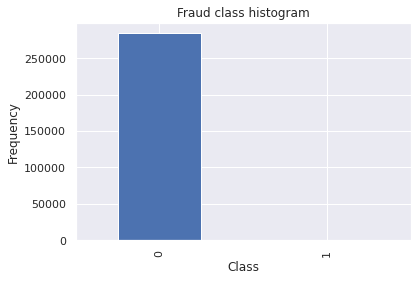

In [3]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [4]:
print('No Frauds = ', data['Class'].value_counts()[0] , ' transactions' ,'--- with a percentage ' ,
      round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds = ' ,data['Class'].value_counts()[1] , ' transactions' ,' --- with percentage  ', 
      round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


No Frauds =  284315  transactions --- with a percentage  99.83 % of the dataset
Frauds =  492  transactions  --- with percentage   0.17 % of the dataset


# Scaling


In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [6]:
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# ****using random shuffling for making balanced data****

In [7]:
#Random shuffling for sample balancing
df = data.sample(frac = 1) 

# **data balancing**

In [8]:
# Count how many targets are 1 (fraud transactions)
num_one_targets = int(np.sum(df['Class']))

# Setting a counter for targets that are 0 (non-fraud transactions)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declaring a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0 then remove it.
for i in range(df.shape[0]):
    if df['Class'][i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
            
# note that we are removing data with indices before shuffling 

balanced_data = data.drop(data.index[indices_to_remove])

print(balanced_data['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


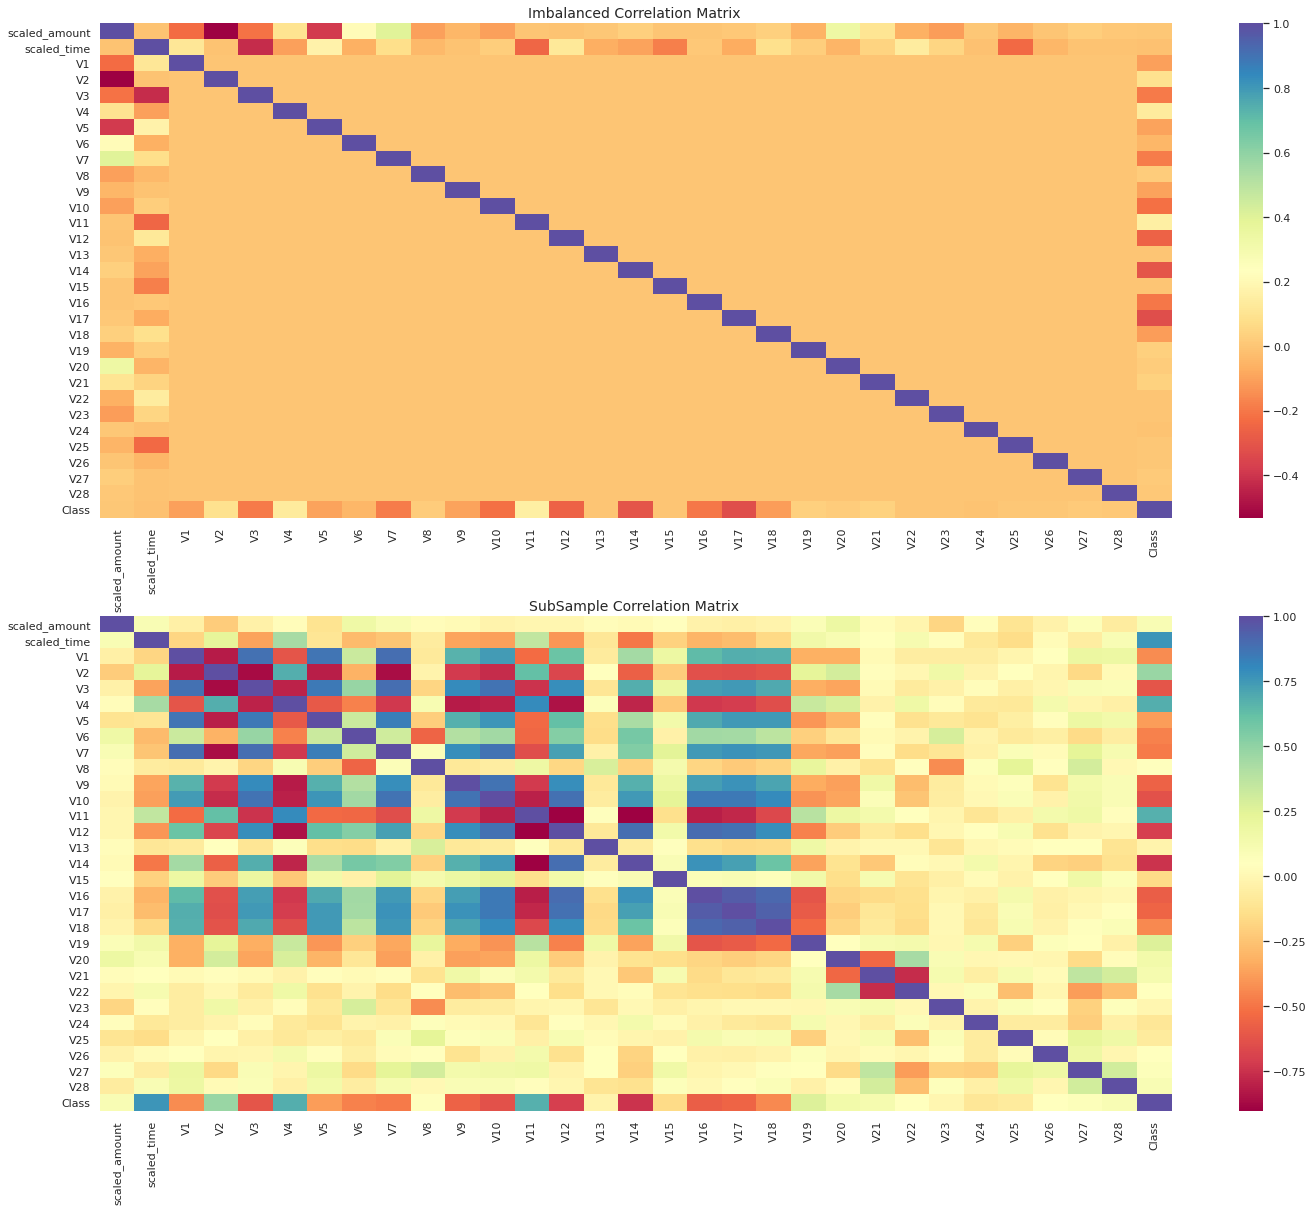

In [9]:
#Exploring Correlations
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='Spectral', ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix ", fontsize=14)


sub_sample_corr = balanced_data.corr()
sns.heatmap(sub_sample_corr, cmap='Spectral',ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()

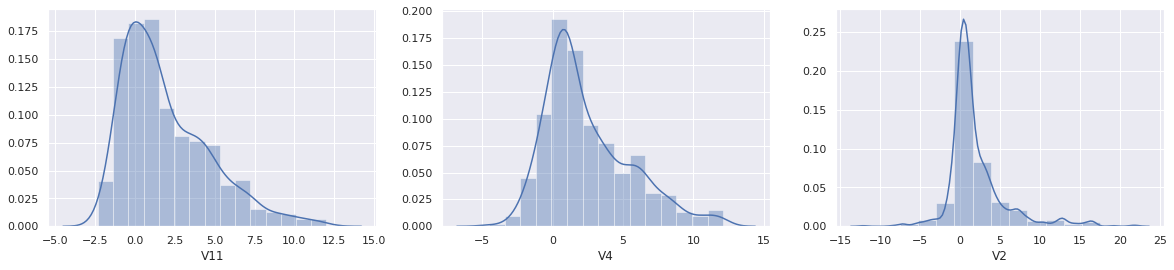

In [10]:
# Positive correlations (The higher the feature , the higher the probability to be a fraud transaction)
# so we will remove the extreme outliers to improve the model accuracy for catching fraud transactions

f, axes = plt.subplots( nrows=1 , ncols= 3, figsize=(20,4))


sns.distplot(balanced_data['V11'], bins=15, ax=axes[0])


sns.distplot(balanced_data['V4'], bins=15, ax=axes[1])


sns.distplot(balanced_data['V2'], bins=15, ax=axes[2])
plt.show()

# - features distributions are gaussian like , with some outliers specially for feature V2
# - using interquartile range method to remove extreme outliers.
# - you can see illustration below


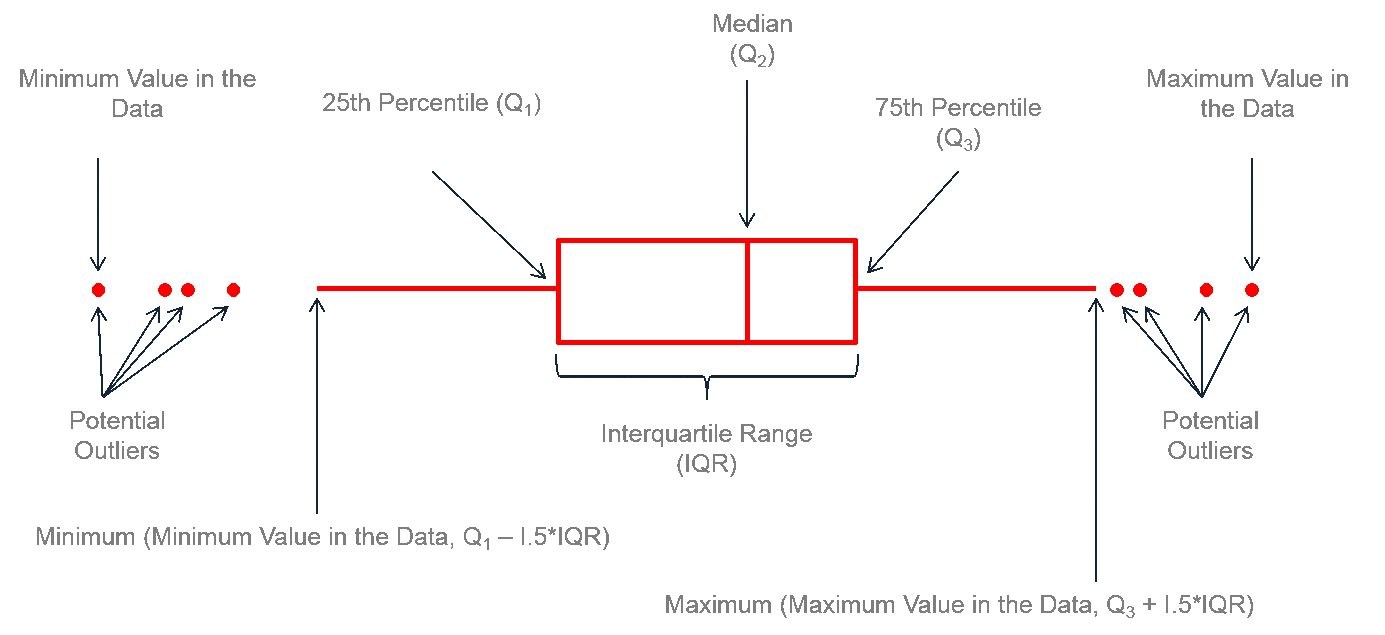

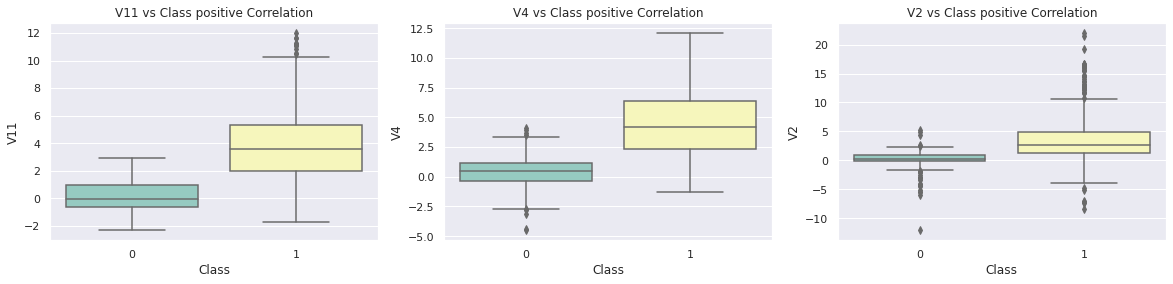

In [11]:
f, axes = plt.subplots( nrows=1 , ncols= 3, figsize=(20,4))


sns.boxplot(x="Class", y="V11", data=balanced_data, palette="Set3", ax=axes[0])
axes[0].set_title('V11 vs Class positive Correlation')


sns.boxplot(x="Class", y="V4", data=balanced_data, palette="Set3", ax=axes[1])
axes[1].set_title('V4 vs Class positive Correlation')


sns.boxplot(x="Class", y="V2", data=balanced_data, palette="Set3", ax=axes[2])
axes[2].set_title('V2 vs Class positive Correlation')
plt.show()

In [12]:
# Removing outliers V11 Feature
V11_fraud = balanced_data['V11'].values
q25, q75 = np.percentile(V11_fraud, 25), np.percentile(V11_fraud, 75)

V11_iqr = q75 - q25
V11_cut_off = V11_iqr * 1.5
V11_lower, V11_upper = q25 - V11_cut_off, q75 + V11_cut_off

print('V11 Lower: ', V11_lower)
print('V11 Upper: ', V11_upper)
outliers = [x for x in V11_fraud if x < V11_lower or x > V11_upper]

print('V11 outliers:' , outliers)
print('Feature V11 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V11'] > V11_upper) | (balanced_data['V11'] < V11_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))

V11 Lower:  -5.84978906604414
V11 Upper:  9.24768215173263
V11 outliers: [12.018913181619899, 10.8530116481991, 11.6197234753825, 11.6692047358121, 10.446846814514, 11.228470279576001, 11.277920727806698, 11.152490598583698, 11.0270590938161, 9.36907905765884, 9.32879925655782, 10.5452629545898, 10.2777688628065, 10.187587324166401, 10.0637897462894, 9.939819741725689, 9.81570317447819, 9.691460982073188, 9.567110295213972, 9.44266526535108, 9.318137685359991, 9.41303953977606]
Feature V11 Outliers for Fraud Cases: 22
Number of Instances after outliers removal:  962


In [13]:
# Removing outliers V4 Feature
V4_fraud = balanced_data['V4'].values
q25, q75 = np.percentile(V4_fraud, 25), np.percentile(V4_fraud, 75)

V4_iqr = q75 - q25
V4_cut_off = V4_iqr * 1.5
V4_lower, V4_upper = q25 - V4_cut_off, q75 + V4_cut_off

print('V4 Lower: ', V4_lower)
print('V4 Upper: ', V4_upper)
outliers = [x for x in V4_fraud if x < V4_lower or x > V4_upper]

print('V4 outliers:' , outliers)
print('Feature V4 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V4'] > V4_upper) | (balanced_data['V4'] < V4_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))


V4 Lower:  -5.204309950330521
V4 Upper:  9.445077570705259
V4 outliers: [10.107273873410099, 9.50559351508723, 10.307226307913199, 10.259035976621801, 10.6485054461688, 10.6485054461688, 10.463866275400198, 11.1908946558522, 11.3451198184298, 11.1227714331133, 12.114671842458902, 9.584968620214902, 11.1254347149714, 11.7374361361796, 11.8450129100508]
Feature V4 Outliers for Fraud Cases: 15
Number of Instances after outliers removal:  947


In [14]:
# Removing outliers V2 Feature
### in this feature i have increased the cut off factor to 2.5 becasue we many outliers in this feature , if we removed all of them we might have the risk of losing too much information ###
V2_fraud = balanced_data['V2'].values
q25, q75 = np.percentile(V2_fraud, 25), np.percentile(V2_fraud, 75)

V2_iqr = q75 - q25
V2_cut_off = V2_iqr * 2.5
V2_lower, V2_upper = q25 - V2_cut_off, q75 + V2_cut_off

print('V2 Lower: ', V2_lower)
print('V2 Upper: ', V2_upper)
outliers = [x for x in V2_fraud if x < V2_lower or x > V2_upper]

print('V2 outliers:' , outliers)
print('Feature V2 Outliers for Fraud Cases:' , len(outliers) )

balanced_data = balanced_data.drop(balanced_data[(balanced_data['V2'] > V2_upper) | (balanced_data['V2'] < V2_lower)].index)
print('Number of Instances after outliers removal: ', len(balanced_data))


V2 Lower:  -5.855240361740904
V2 Upper:  8.341974033452349
V2 outliers: [-12.1142127363483, -5.93171744106428, 10.3939171427504, 10.5417508026636, 10.8196653713117, 11.586380519818402, 11.817921989785301, 12.095893225929899, 12.3739891389716, 12.6521968313004, 12.9305051249875, 13.208904284417601, 13.4873857909274, 13.7659421584186, 14.044566781510598, 14.323253809723301, 14.6019980426299, 15.3658043803315, 15.598192662555402, 15.876922987953598, 16.1557014298057, 16.4345245512223, 16.7133892350242, 8.401421010402581, 8.71325017095966, 9.28684735978866, 9.84315322329519, -6.976420007546411, 12.785970638297998, 12.785970638297998, 12.785970638297998, 12.785970638297998, 12.785970638297998, 12.785970638297998, 16.497471901867, 16.497471901867, 16.497471901867, 16.497471901867, 10.4325276778611, 15.53613332478, -7.15904171709445, -7.4490151587267395, -7.19697963053735, -8.402153677689151]
Feature V2 Outliers for Fraud Cases: 44
Number of Instances after outliers removal:  903


In [15]:
print('No Frauds = ', balanced_data['Class'].value_counts()[0] , ' transactions' ,'--- with a percentage ' ,
      round(balanced_data['Class'].value_counts()[0]/len(balanced_data) * 100,2), '% of the dataset')
print('Frauds = ' ,balanced_data['Class'].value_counts()[1] , ' transactions' ,' --- with percentage  ', 
      round(balanced_data['Class'].value_counts()[1]/len(balanced_data) * 100,2), '% of the dataset')


No Frauds =  490  transactions --- with a percentage  54.26 % of the dataset
Frauds =  413  transactions  --- with percentage   45.74 % of the dataset


In [16]:
# balancing the dataset again after removing outliers
num_one_targets = int(np.sum(balanced_data['Class']))
zero_targets_counter = 0
indices_to_remove = []

for i in range(balanced_data.shape[0]):
    if balanced_data['Class'].iloc[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
balanced_data = balanced_data.drop(balanced_data.index[indices_to_remove])

print('No Frauds', round(balanced_data['Class'].value_counts()[0]/len(balanced_data) * 100,2), '% of the dataset')
print('Frauds', round(balanced_data['Class'].value_counts()[1]/len(balanced_data) * 100,2), '% of the dataset')


No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [17]:
dataset = balanced_data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.99      1.00      0.99        83

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



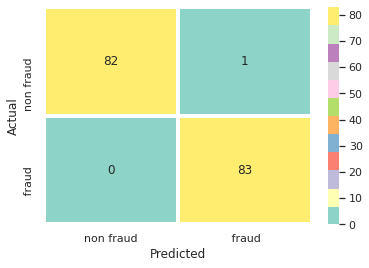

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


y_actual = ["non fraud"," fraud"]
y_predicted = ["non fraud"," fraud"]

df_cm = pd.DataFrame(cm, columns=(y_predicted), index = (y_actual))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.heatmap(df_cm,linewidths=3, cmap="Set3", annot=True)
ax1.set_title("confusion matrix", fontsize=14)
plt.show()



In [21]:
## Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.64 %
Standard Deviation: 1.58 %
